# Project: anomalous diffusion model with molecular crowding coefficient

In [1]:
# starters: 2D random walk
import numpy as np
import matplotlib.pyplot as plt

def dist(bps, mon_length):
  '''Returns approximated total distance in m for a specified monomer
  length (mon_length) using random-walk statistics.'''
  x_loc = 0
  y_loc = 0
  #z_loc = 0
  T = bps
  for i in range(T):
    # random theta and phi
    #phi = np.random.uniform()*2*np.pi # 0 to 2pi rad
    theta = np.random.uniform()*np.pi # 0 to pi rad
    # in 3D:
    x_loc += np.cos(theta)
    y_loc += np.sin(theta)
    #z_loc += np.cos(theta)
  r = (np.sqrt(x_loc**2 + y_loc**2 ) * mon_length)/2

  return r

In [2]:
# starters: 2D random walk
import numpy as np
import matplotlib.pyplot as plt

def dist(bps, mon_length):
  '''Returns approximated total distance in m for a specified monomer
  length (mon_length) using random-walk statistics.'''
  x_loc = 0
  y_loc = 0
  #z_loc = 0
  T = bps
  for i in range(T):
    # random theta and phi
    #phi = np.random.uniform()*2*np.pi # 0 to 2pi rad
    theta = np.random.uniform(0,2*np.pi) # 0 to pi rad
    # in 3D:
    x_loc += np.cos(theta)
    y_loc += np.sin(theta)
    #z_loc += np.cos(theta)
  r = (np.sqrt(x_loc**2 + y_loc**2 ) * mon_length)

  return r

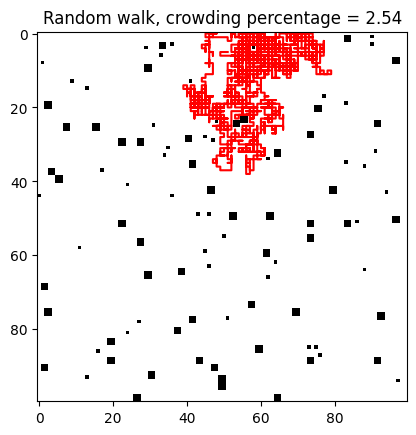

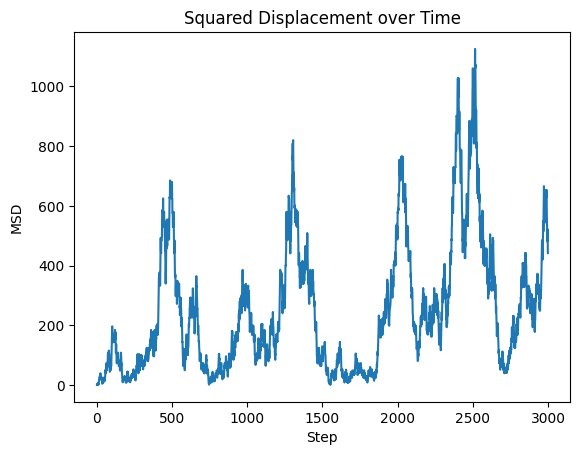

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

size = 100
crowding = 0.01
min_obstacle_size = 1
max_obstacle_size = 2
steps = 3000


def create_square(size,crowding,min_obstacle_size,max_obstacle_size):
    square = np.zeros((size,size))
    num_obstacles = int(crowding * size * size)
    tot_obs_sizes = 0
    for i in range(num_obstacles):
      obstacle_size = np.random.randint(min_obstacle_size, max_obstacle_size+1)
      x = np.random.randint(0, size-obstacle_size+1)
      y = np.random.randint(0, size-obstacle_size+1)
      square[x:x+obstacle_size, y:y+obstacle_size] = 1

    area_covrd = 0
    for r in range(size):
      for c in range(size):
        if square[r][c] == 1:
          area_covrd += 1

    crowding_pctng = area_covrd/(size**2) * 100
    return square, crowding_pctng

def twoD_random_walk(square, steps):
    while True:
      x = random.randint(0, square.shape[0] - 1)
      y = random.randint(0, square.shape[1] - 1)
      if square[x, y] == 0:
          break

    x0, y0 = x, y
    positions = [(x, y)]
    msd_values = []

    for _ in range(steps):
        dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])

        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < square.shape[0] and 0 <= new_y < square.shape[1] and square[new_x, new_y] == 0:
            x, y = new_x, new_y

        positions.append((x, y))
        msd = (x-x0)**2 + (y-y0)**2
        msd_values.append(msd)
    return positions, msd_values

square, percentage = create_square(size, crowding, min_obstacle_size, max_obstacle_size)
positions, msd_values = twoD_random_walk(square, steps)

plt.imshow(1 - square, cmap='gray')
plt.plot([pos[1] for pos in positions], [pos[0] for pos in positions], color='red')
plt.title("Random walk, crowding percentage = " + str(percentage))
plt.show()


plt.plot(msd_values)
plt.title("Squared Displacement over Time")
plt.xlabel("Step")
plt.ylabel("MSD")
plt.show()

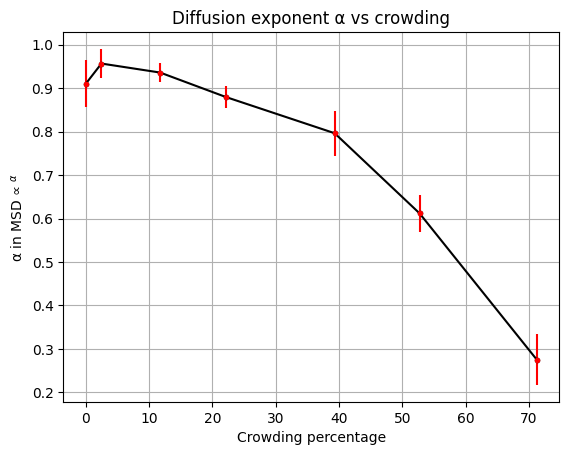

In [ ]:
import random
from scipy.stats import linregress

size = 100
min_obstacle_size = 1
max_obstacle_size = 2
steps = 1000
n_runs = 100
crowding_levels = [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

crowding_percentages = []
crowding_stats = []
alpha_values = []
stats = []

def twoD_random_walk(square, steps):
    while True:
      x = random.randint(0, square.shape[0] - 1)
      y = random.randint(0, square.shape[1] - 1)
      if square[x, y] == 0:
          break

    x0, y0 = x, y
    positions = [(x, y)]
    msd_values = []

    for _ in range(steps):

        dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])

        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < square.shape[0] and 0 <= new_y < square.shape[1] and square[new_x, new_y] == 0:
            x, y = new_x, new_y
        positions.append((x, y))
        msd = (x-x0)**2 + (y-y0)**2
        msd_values.append(msd)
    return msd_values

for i in range(5):
  for crowding in crowding_levels:
      all_msd = np.zeros(steps)
      avg_crwd = 0
      for _ in range(n_runs):
          square, percnt = create_square(size, crowding, min_obstacle_size, max_obstacle_size)
          msd = twoD_random_walk(square, steps)
          avg_crwd += percnt
          all_msd += np.array(msd)
      avg_crwd = avg_crwd/n_runs
      avg_msd = all_msd / n_runs

      log_steps = np.log(np.arange(1, steps + 1))
      log_msd = np.log(avg_msd + 1e-8)
      slope, intercept, _, _, _ = linregress(log_steps, log_msd)
      alpha_values.append(slope)
      crowding_percentages.append(avg_crwd)

  crowding_stats.append(np.asarray(crowding_percentages))
  crowding_percentages = []
  stats.append(np.asarray(alpha_values))
  alpha_values = []

mean_alphas = np.mean(stats, axis = 0)
mean_crwd = np.mean(crowding_stats, axis = 0)
stats2 = np.transpose(stats)
errors = []
for row in stats2:
  err_bar = np.std(row)
  errors.append(err_bar)

plt.errorbar(mean_crwd, mean_alphas, yerr= errors, fmt = "." color='red')
plt.plot(mean_crwd, mean_alphas, ".", linestyle = "-", c = 'k')
plt.xlabel('Crowding Level')
plt.ylabel('α in MSD ∝ $\t^α$')
plt.title('Diffusion exponent α vs crowding')
plt.grid(True)
plt.show()

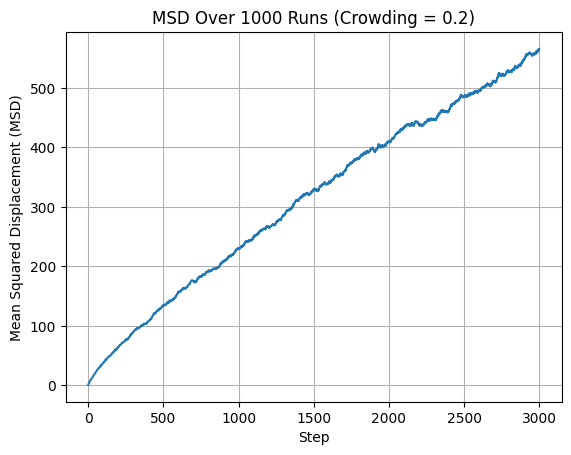

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
size = 100
crowding = 0.2
min_obstacle_size = 1
max_obstacle_size = 2
steps = 3000
n_runs = 1000  # number of times to run the simulation

# Create a 2D grid with obstacles
def create_square(size, crowding, min_obstacle_size, max_obstacle_size):
    square = np.zeros((size, size))
    num_obstacles = int(crowding * size * size)
    for _ in range(num_obstacles):
        obstacle_size = np.random.randint(min_obstacle_size, max_obstacle_size + 1)
        x = np.random.randint(0, size - obstacle_size + 1)
        y = np.random.randint(0, size - obstacle_size + 1)
        square[x:x + obstacle_size, y:y + obstacle_size] = 1
    return square

def twoD_random_walk(square, steps):
    while True:
        x = random.randint(0, square.shape[0] - 1)
        y = random.randint(0, square.shape[1] - 1)
        if square[x, y] == 0:
            break

    x0, y0 = x, y
    msd_values = []

    for _ in range(steps):
        dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < square.shape[0] and 0 <= new_y < square.shape[1] and square[new_x, new_y] == 0:
            x, y = new_x, new_y
        msd = (x - x0)**2 + (y - y0)**2
        msd_values.append(msd)

    return msd_values

all_msd = np.zeros(steps)

for i in range(n_runs):
    square = create_square(size, crowding, min_obstacle_size, max_obstacle_size)
    msd = twoD_random_walk(square, steps)
    all_msd += np.array(msd)

avg_msd = all_msd / n_runs

plt.plot(avg_msd)
plt.title(f"MSD Over {n_runs} Runs (Crowding = {crowding})")
plt.xlabel("Step")
plt.ylabel("Mean Squared Displacement (MSD)")
plt.grid(True)
plt.show()

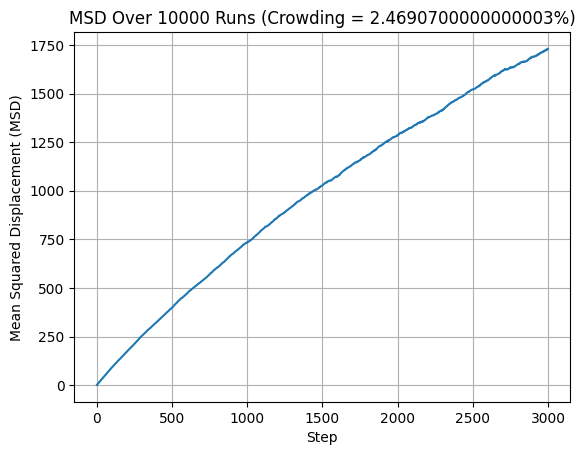

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
size = 100
crowding = 0.01
min_obstacle_size = 1
max_obstacle_size = 2
steps = 3000
n_runs = 10000  # number of times to run the simulation

# Create a 2D grid with obstacles

def create_square(size,crowding,min_obstacle_size,max_obstacle_size):
    square = np.zeros((size,size))
    num_obstacles = int(crowding * size * size)
    tot_obs_sizes = 0
    for i in range(num_obstacles):
      obstacle_size = np.random.randint(min_obstacle_size, max_obstacle_size+1)
      x = np.random.randint(0, size-obstacle_size+1)
      y = np.random.randint(0, size-obstacle_size+1)
      square[x:x+obstacle_size, y:y+obstacle_size] = 1
    # compute total obstacle sizes/total area of space
    # sweep matrix:
    area_covrd = 0
    for r in range(size):
      for c in range(size):
        if square[r][c] == 1:
          area_covrd += 1

    crowding_pctng = area_covrd/(size**2) * 100
    return square, crowding_pctng

def twoD_random_walk(square, steps):
    while True:
        x = random.randint(0, square.shape[0] - 1)
        y = random.randint(0, square.shape[1] - 1)
        if square[x, y] == 0:
            break

    x0, y0 = x, y
    msd_values = []

    for _ in range(steps):
        dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < square.shape[0] and 0 <= new_y < square.shape[1] and square[new_x, new_y] == 0:
            x, y = new_x, new_y
        msd = (x - x0)**2 + (y - y0)**2
        msd_values.append(msd)

    return msd_values

all_msd = np.zeros(steps)
all_pcnt = 0

for i in range(n_runs):
    square, pcntg = create_square(size, crowding, min_obstacle_size, max_obstacle_size)
    msd = twoD_random_walk(square, steps)
    all_pcnt += pcntg
    all_msd += np.array(msd)

avg_pcnt = all_pcnt/n_runs
avg_msd = all_msd / n_runs

plt.plot(avg_msd)
plt.title(f"MSD Over {n_runs} Runs (Crowding = {avg_pcnt}%)")
plt.xlabel("Step")
plt.ylabel("Mean Squared Displacement (MSD)")
plt.grid(True)
plt.show()

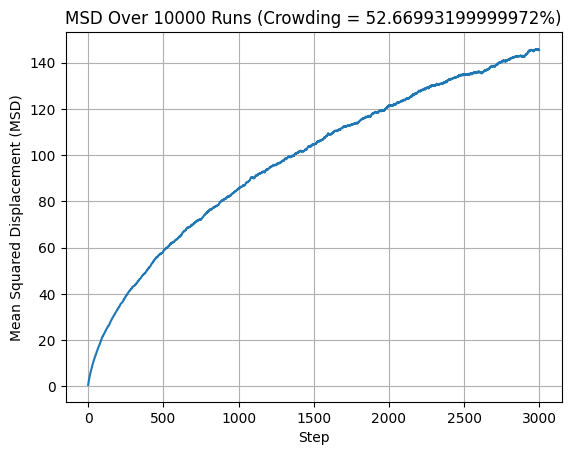

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

size = 100
crowding = 0.01
min_obstacle_size = 1
max_obstacle_size = 2
steps = 3000
n_runs = 10000


def create_square(size,crowding,min_obstacle_size,max_obstacle_size):
    square = np.zeros((size,size))
    num_obstacles = int(crowding * size * size)
    tot_obs_sizes = 0
    for i in range(num_obstacles):
      obstacle_size = np.random.randint(min_obstacle_size, max_obstacle_size+1)
      x = np.random.randint(0, size-obstacle_size+1)
      y = np.random.randint(0, size-obstacle_size+1)
      square[x:x+obstacle_size, y:y+obstacle_size] = 1

    area_covrd = 0
    for r in range(size):
      for c in range(size):
        if square[r][c] == 1:
          area_covrd += 1

    crowding_pctng = area_covrd/(size**2) * 100
    return square, crowding_pctng

def twoD_random_walk(square, steps):
    while True:
        x = random.randint(0, square.shape[0] - 1)
        y = random.randint(0, square.shape[1] - 1)
        if square[x, y] == 0:
            break

    x0, y0 = x, y
    msd_values = []

    for _ in range(steps):
        dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < square.shape[0] and 0 <= new_y < square.shape[1] and square[new_x, new_y] == 0:
            x, y = new_x, new_y
        msd = (x - x0)**2 + (y - y0)**2
        msd_values.append(msd)

    return msd_values

all_msd = np.zeros(steps)
all_pcnt = 0

for i in range(n_runs):
    square, pcntg = create_square(size, crowding, min_obstacle_size, max_obstacle_size)
    msd = twoD_random_walk(square, steps)
    all_pcnt += pcntg
    all_msd += np.array(msd)

avg_pcnt = all_pcnt/n_runs
avg_msd = all_msd / n_runs

plt.plot(avg_msd)
plt.title(f"MSD Over {n_runs} Runs (Crowding = {avg_pcnt}%)")
plt.xlabel("Step")
plt.ylabel("Mean Squared Displacement (MSD)")
plt.grid(True)
plt.show()